## EE 242 Lab 2 – Convolution

Dylan D., Diego C., Yash A. 

(This should be a markup cell, which means that when you run it you just get formated text.)

In [31]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 
from scipy.io import wavfile as wav
import simpleaudio as sa
from skimage import color 
from scipy import ndimage

## Summary

In this lab, you will work through a series of exercises involving convolution of time signals and images.  This is a two-week lab.  You should plan on completing the first 3 assignments in the first week.

## Lab 2 turn in checklist

•	Pre-lab (upload to canvas before lab)

•	Lab 1 Jupyter notebook with code for the first 4 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

•	1 individual Jupyter notebook with code + markdown cells for the last exercise

Note: The pre-lab should be done individually, and all other assignments should be completed in groups of 3-4 people.


## Assignment 1 -- Simple Convolutions

<IPython.core.display.Javascript object>


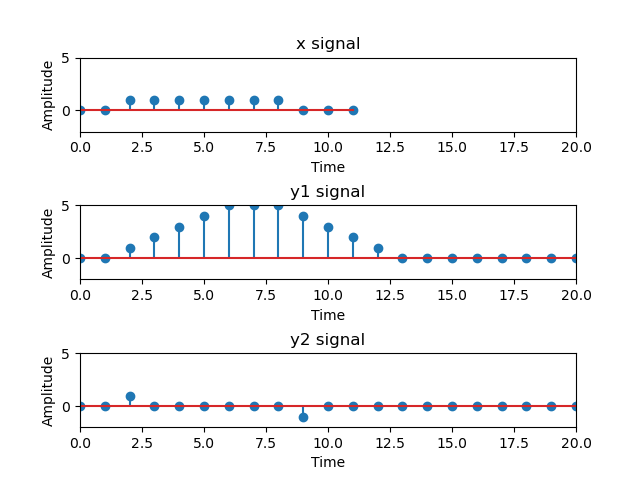

<StemContainer object of 3 artists>

In [32]:
# Assignment 1 - Time Scaling Function

# Part A

# Create three discrete-time signals, assuming a time range of [0,12]
# x: input signal vector, a box of height 1 starting at time n=2 and ending at n=8
# h1: a pulse of length 4 & height 1 starting at time 0
# h2 = 1 at n=0, -1 at n=1, and 0 otherwise
# TODO: Code that solves A
# Use np.piecewise to make piecewise functions (the different signals)
t = np.arange(0, 12, 1)
x = np.piecewise(t, [(2 <= t) * (t <= 8)], [1])
h1 = np.piecewise(t, [t <= 4], [1])
h2 = np.piecewise(t, [t == 0, t == 1, (t != 0) * (t != 1)], [1, -1, 0])

# Part B
# Find the responses y1=x*h1 and y2=x*h2
# TODO: Code that solves B
# Perform the convlutions
y1 = np.convolve(x, h1)
y2 = np.convolve(x, h2)

# Part C
# Plot x, y1 and y2 in a 3x1 plot
# TODO: Code that solves C
# Plot the convolved signals 
plt.figure()
plt.subplots_adjust(hspace=1)
plt.subplot(3, 1, 1)
plt.xlim(0, 20)
plt.ylim(-2, 5)
plt.title('x signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.stem(x)
plt.subplot(3, 1, 2)
plt.xlim(0, 20)
plt.ylim(-2, 5)
plt.title('y1 signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.stem(y1)
plt.subplot(3, 1, 3)
plt.xlim(0, 20)
plt.ylim(-2, 5)
plt.title('y2 signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.stem(y2)


###  Discussion

Comment on what aspects of the input signal correspond to the largest values of y1[n] and y2[n]

The middle and the ends respectively.

## Assignment 2 -- Smoothing Signals

<IPython.core.display.Javascript object>


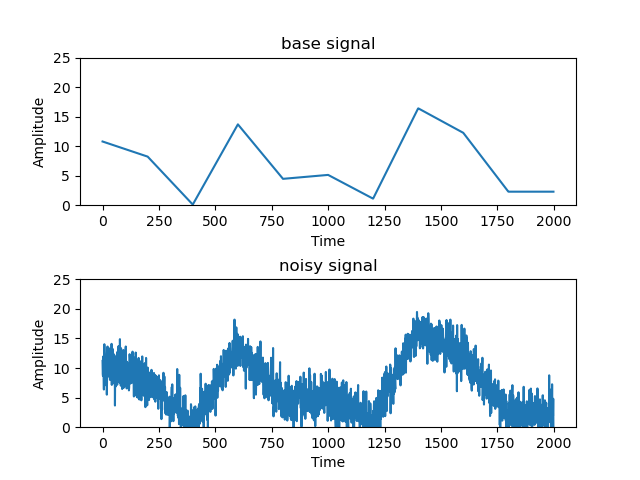

<IPython.core.display.Javascript object>


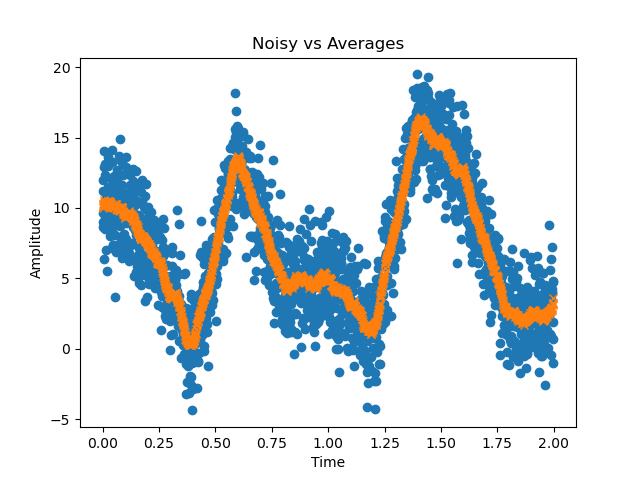

<IPython.core.display.Javascript object>


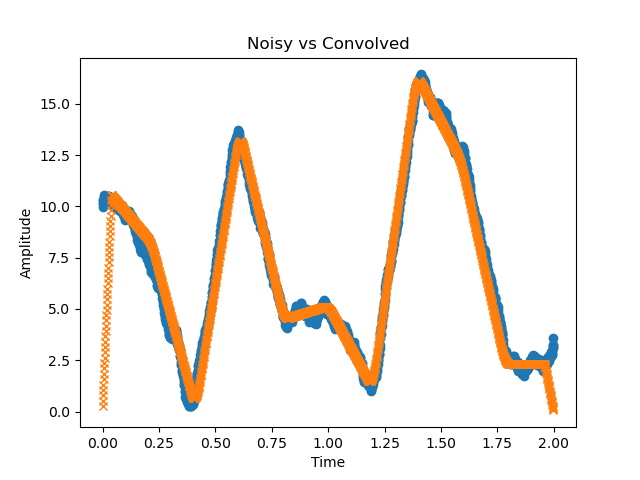

In [57]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# set up relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
n     = len(time) # length of the time vector

# here is a base signal to work with, values of signal points chosen randomly
p     = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# create some random noise to be added to the abve base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

# add noise to the base signals to create new noisy signals
noisy = base + noise
# Plot the two signals to compare
plt.figure()
plt.subplots_adjust(hspace=0.5)
plt.subplot(2, 1, 1)
plt.ylim(0, 25)
plt.title('base signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(base)
plt.subplot(2, 1, 2)
plt.ylim(0, 25)
plt.title('noisy signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(noisy)

# Part B
# implement the running mean filter with a for loop
# TODO: Code that solves B
k = 20
avg_noisy = np.copy(noisy)
noisy_copy = np.copy(noisy)
for i in range(0, len(noisy_copy)):
    # For the cases where we don't have enough values at the start
    if i < k:
        total = sum(noisy_copy[:i + k + 1]) - noisy_copy[i]
        average = total / (len(noisy_copy[:i + k]))
    # For the cases where we don't have enough values at the end
    elif i > len(noisy_copy) - k - 1:
        total = sum(noisy_copy[i - k:len(noisy_copy)]) - noisy_copy[i]
        average = total / (len(noisy_copy[i - k:len(noisy_copy)]) - 1)
    # For all other cases
    else:
        total = sum(noisy_copy[i - k: i + k + 1]) - noisy_copy[i]
        average = total / (len(noisy_copy[i -k: i + k]))
    avg_noisy[i] = average
# Plotting two signals to compare
filtsig1 = avg_noisy
fig, ax1 = plt.subplots()
plt.title('Noisy vs Averages')
plt.xlabel('Time')
plt.ylabel('Amplitude')
ax1.plot(time, noisy, 'o')
ax1.plot(time, filtsig1, 'x')
plt.show()

# Part C
# implement smoothing using convolution
# TODO: Code that solves C
# Creating the signal to convolve with
N = 2 * k + 1
hfilt = np.ones(N) / N
# Convolve the two signals
filtsig2 = np.convolve(base, hfilt)
newtime = np.arange(0, 2, 2/len(filtsig2))
# Plot the two signals to compare
fig, ax2 = plt.subplots()
plt.title('Noisy vs Convolved')
plt.xlabel('Time')
plt.ylabel('Amplitude')
ax2.plot(time, filtsig1, 'o')
ax2.plot(newtime, filtsig2, 'x')
plt.show()



###  Discussion

Describe the differences in the results using the two methods and explain these differences in terms of system properties. Comment on how the results and plots change when you amplify the noise more and also change the value of k. 

The convolution method runs into issues towards the start and the end of the signal (the values head to zero even though this should not neccesarily be the case). When we amplify the noise more, the average method is more jagged while the convolution method is more smooth. The lower the k value, the closer the two signals look like each other.

## Assignment 3 -- Removing Noise from an Audio Signal 

In [43]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A
# Read in the audio file
tr_orig_fs, tr_orig = wav.read('trombone11.wav')
# Create some noise and then add it to the audio
noiseamp3 = 100
noise3 = noiseamp3 * np.random.randn(len(tr_orig))
tr_noisy = tr_orig + noise3
outfile31 = 'tr_noisy.wav'
wav.write(outfile31, tr_orig_fs, tr_noisy.astype('int16'))

# Part B
# TODO: Code that solves B
# Convolve the noisy file with the filter made in assignment 2
tr_filt = np.convolve(tr_noisy, hfilt)
# Write out the file
outfile32 = 'tr_filt.wav'
wav.write(outfile32, tr_orig_fs, tr_filt.astype('int16'))

# Part C
# TODO: Code that solves C
# Read in both files to play and compare them
wav_obj31 = sa.WaveObject.from_wave_file('tr_noisy.wav')
wav_obj32 = sa.WaveObject.from_wave_file('tr_filt.wav')
play_obj = wav_obj31.play()
play_obj.wait_done()
play_obj = wav_obj32.play()

###  Discussion

Comment on the differences in how the original and noise-removed signals sound. Comment on the impact of large increases or decreases in the value of k. 

The noise-removed sounds very close to the original however it is more quiet. Increases or decreases of k only seem to impact the value of the sounds.

## Assignment 4 -- Convolution with Images

<IPython.core.display.Javascript object>


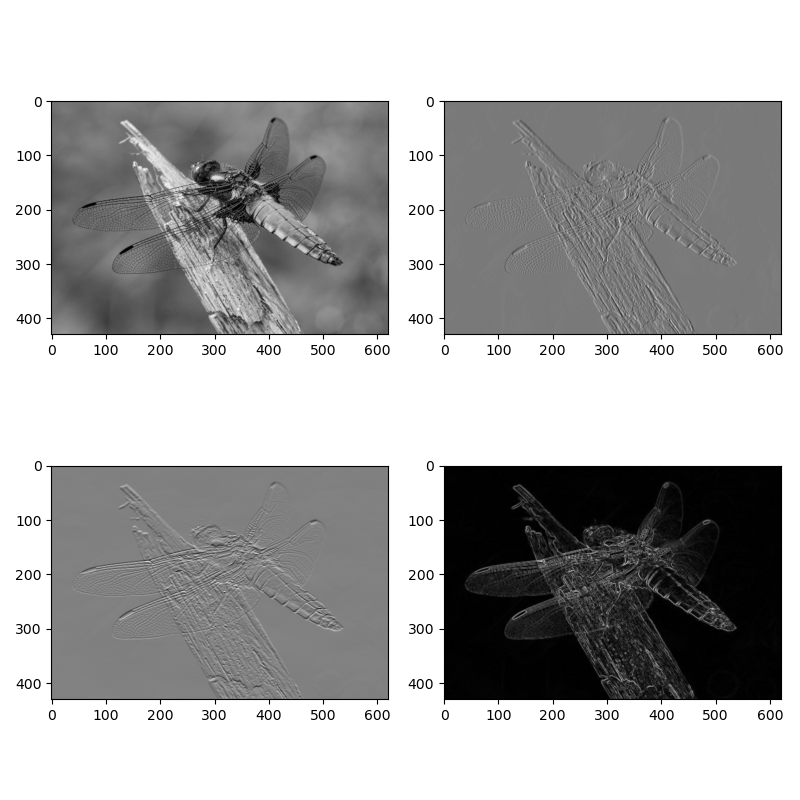

<IPython.core.display.Javascript object>


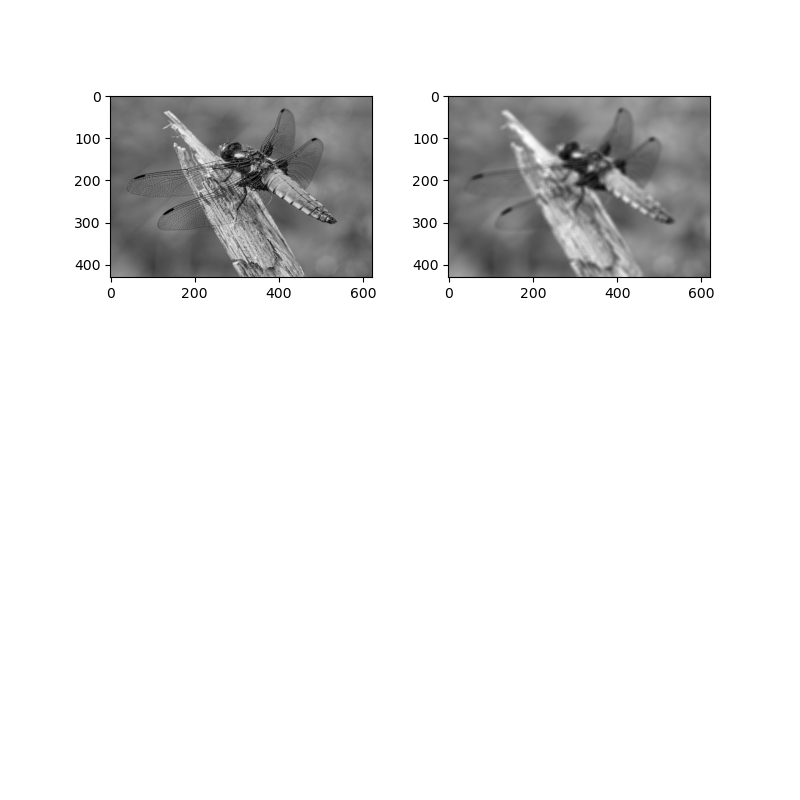

<IPython.core.display.Javascript object>


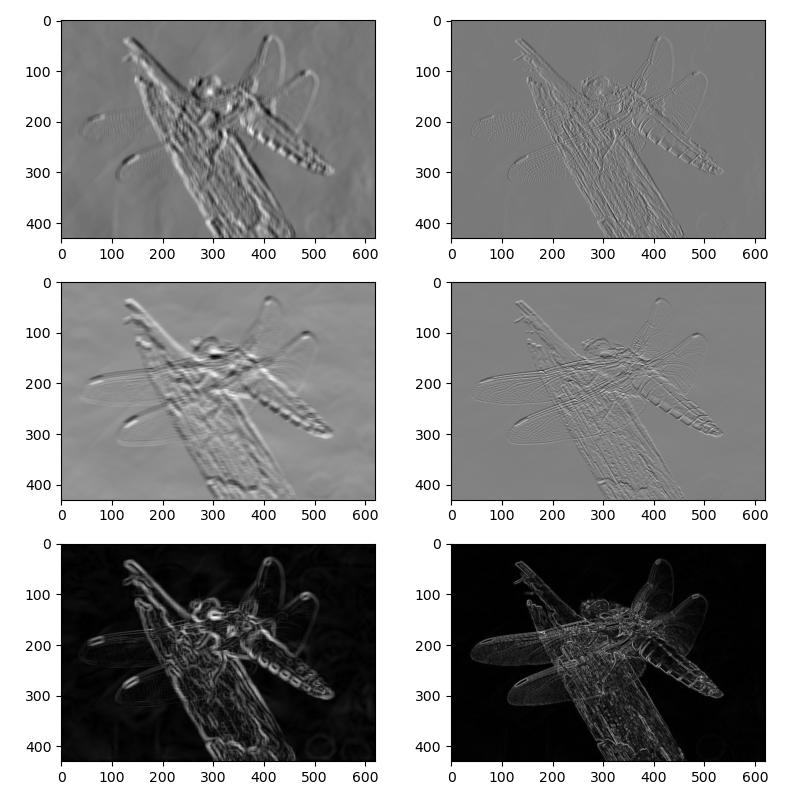

In [17]:
# Part A
# TODO: Code that solves A
def sobel_edge(image):
    h1 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    h2 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    y1 = ndimage.filters.convolve(image, h1)
    y2 = ndimage.filters.convolve(image, h2)
    ynm = np.sqrt(np.power(y1, 2)+np.power(y2, 2))

    h_edges = y1
    v_edges = y2
    c_edges = ynm

    return h_edges, v_edges, c_edges

# Part B
# TODO: Code that solves B
image = color.rgb2gray(plt.imread('dragonfly.jpg'))
image_h, image_v, image_c = sobel_edge(image)

fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.subplot(2, 2, 2)
plt.imshow(image_h, cmap = 'gray')
plt.subplot(2, 2, 3)
plt.imshow(image_v, cmap = 'gray')
plt.subplot(2, 2, 4)
plt.imshow(image_c, cmap = 'gray')
fig.tight_layout()

# Part C
# TODO: Code that solves C
# kernel of ones multiplied by .01 to get desired kernel 
kernel = np.ones((10,10))*.01
# convolve kernel w/ image 
a1 = ndimage.convolve(image, kernel)
# outputs image after convolution 
fig = plt.figure(figsize=(8, 8))
#displays image
plt.subplot(3, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.subplot(3, 2, 2)
plt.imshow(a1, cmap = 'gray')

# Part D
# TODO: Code that solves D
a1_h,a1_v,a1_c = sobel_edge(a1)
#Plots and shows each image with their respective partner
fig = plt.figure(figsize=(8, 8))
plt.subplot(3, 2, 1)
plt.imshow(a1_h, cmap = 'gray')
plt.subplot(3, 2, 2)
plt.imshow(image_h, cmap = 'gray')
plt.subplot(3, 2, 3)
plt.imshow(a1_v, cmap = 'gray')
plt.subplot(3, 2, 4)
plt.imshow(image_v, cmap = 'gray')
plt.subplot(3, 2, 5)
plt.imshow(a1_c, cmap = 'gray')
plt.subplot(3, 2, 6)
plt.imshow(image_c, cmap = 'gray')
fig.tight_layout()

### Discussion

Describe the differences in the results using the edge detector or the original and smoothed image. Comment on how the results change if you use a larger size smoothing filter.

The original is much more clearer than the smoothed image. The smooth image is blurred because it only focuses on the verticel and horizontal edges and ignores the rest of the details in the image. Smoothing just makes it more blurry. The larger the smoothing filter, the more blurred it is.